In [447]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [449]:
img_fid = np.array([[656, 2144],   # 155 Dean St
                    [351, 1096],   # 370 4th Ave
                    [967, 1446],   # 198 Bond St
                    [3439, 1089],  # 126 13th St
                    [4005, 1542],  # 241 Hoyt St
                    [2910, 1936],  # 175 Hoyt St
                    [1984, 1668],  # 417 Baltic St
                    [1894, 2165],  # 155 Dean St back-right corner
                    [786, 2482],   # 97 Hoyt St
                    [2934, 2483]]) # 160 Schermerhorn St

ldr_fid = np.array([[9.87856166e+05, 1.89364434e+05, 60], # 155 Dean St
                    [9.87851166e+05, 1.84582434e+05, 5.80000000e+01], # 4th Ave
                    [9.87753166e+05, 1.88285434e+05, 128], # 198 Bond St
                    [9.86039166e+05, 1.83084434e+05, 3.20000000e+01], #126 13th St
                    [9.87241166e+05, 1.88546434e+05, 93], # 241 Hoyt St
                    [9.87414166e+05, 1.88864434e+05, 55.7], # 175 Hoyt St
                    [9.87556166e+05, 1.88604434e+05, 117],
                    [9.87671816e+05, 1.89426084e+05, 60],
                    [9.87855866e+05, 1.89793684e+05, 46.5],
                    [9.87694656e+05, 1.90460144e+05, 97.2]])

img_dim = np.array([4096, 3072])

In [450]:
def colin_inv_rad(params, xim, yim, r):
    """
    This function returns inverse of the colinearity equations.  Namely 
    given camera paramters and a location on the image, return the x, y, z
    coordinate for a given distance from the camera r.
    NOTE: this function is vectorized in z.
    Parameters
    ----------
    params : tuple
        The camera parameters kappa, phi, omega, xs, ys, zs, and f.
    xim : float
        The x location in an image.
    yim : float
        The y location in an image.
    r : float
        The distance from the camera.
    Returns
    -------
    x, y, z : tuple
        The x and y locations of the projected points.  These are either 
        floats, or ndarrays
    """

    # -- careful about zeros
    xim += 1e-3
    yim += 1e-3

    # -- Unwrap params
    kappa, phi, omega, xs, ys, zs, f = params

    omega = float(omega)
    phi   = float(phi) + 0.5 * np.pi
    kappa = float(kappa)
    xs    = float(xs)
    ys    = float(ys)
    zs    = float(zs)
    f     = float(f)

    # -- utils
    co = np.cos(omega)
    so = np.sin(omega)
    cp = np.cos(phi)
    sp = np.sin(phi)
    ck = np.cos(kappa)
    sk = np.sin(kappa)

    a1 =  cp * ck + sp * so * sk
    b1 =  cp * sk + sp * so * ck
    c1 =  sp * co
    a2 = -co * sk
    b2 =  co * ck
    c2 =  so
    a3 =  sp * ck + cp * so * sk
    b3 =  sp * sk - cp * so * ck
    c3 =  cp * co

    d1 = a3 * xim + f * a2
    d2 = b3 * xim + f * b2
    d3 = c3 * xim + f * c2
    d4 = a3 * yim - f * a1
    d5 = b3 * yim - f * b1
    d6 = c3 * yim - f * c1

    e1 = (d6 * d2 - d3 * d5) / (d1 * d5 - d4 * d2)
    e2 = (d6 * d1 - d3 * d4) / (d2 * d4 - d5 * d1)
    e3 = 1.0 / np.sqrt(1 + e1 * e1 + e2 * e2)

    # -- return the x, y, z location of the projected point
    x = e1 * e3 * r + xs
    y = e2 * e3 * r + ys
    z = e3 * r + zs
    
    xyz = np.vstack([x, y, z]).T
    return xyz

In [451]:
params = np.array([  4.75,   3.23700535e-02,   4.09325034e-02,
         9.87923097e+05,   1.91284184e+05,   2.00000184e+02,
         1.09257876e+04])

In [452]:
colin_xyz = colin_inv_rad(params, xim, yim, dist)

In [462]:
#params = np.array([4.70972911e+00,  -5.65282641e-02,   2.15931272e-01,
#         9.88038172e+05,   1.91284935e+05,   1.00001642e+02,
#         1.95207028e+04])
#params = np.array([7*np.pi/4, 0.031780597404047164, 6.2203534541077907,
 #                  987922.03610049537, 191807.32999806647, 233.52199927717587,
  #                 16534.751159015872])
#params = np.array([4.58626623e+00, -5.60405800e-02, 1.03110986e-13, 
#                   9.87909846e+05, 1.91300342e+05, 2.37734868e+02, 1.46392513e+04])
#params = np.array([2.4, -5.60405800e-02, 1.03110986e-13, 
 #                  9.87909846e+05, 1.91300342e+05, 2.37734868e+02, 1000])
#params = np.array([  5.44469858e+00,  -7.91506506e-01,   1.42943703e+00,
 #        9.88712188e+05,   1.91047051e+05,   1.00239911e+02,
  #       4.83704200e+04])
params = np.array([  4.75,   3.23700535e-02,   4.09325034e-02,
         9.87923097e+05,   1.91284184e+05,   2.00000184e+02,
         13000])
#params = np.array([4.57532615e+00,  -2.51872502e-03,   6.64748832e-03,
 #        9.87937307e+05,   1.91310118e+05,   3.00105580e+02,
  #       1.01357937e+05])

In [454]:
xim = img_fid[:,0].astype(float)
yim = img_fid[:,1].astype(float)

In [455]:
x0 = params[3]
y0 = params[4]

In [458]:
dist = np.zeros(np.shape(xy)[0])

for i in range(np.shape(xy)[0]):
    dist[i] = 1.0*((x0 - xy[i][0])**2 + (y0 - xy[i][1])**2)**0.5
print dist

[ 1947.3751795   6728.23545038  3030.28401437  8441.84911757  2850.01079713
  2501.00914307  2732.39718374  1902.64804529  1518.61934429   883.93173293]


In [459]:
np.array(dist)

array([ 1947.3751795 ,  6728.23545038,  3030.28401437,  8441.84911757,
        2850.01079713,  2501.00914307,  2732.39718374,  1902.64804529,
        1518.61934429,   883.93173293])

In [463]:
# Note, this is without centralizing the points
# When centralized xim, yim the projection looks completely off
test_rad = colin_inv_rad(params, xim, yim, dist)
#test_rad = colin_inv_rad(params, xim-4096//2, yim-3072//2, dist)

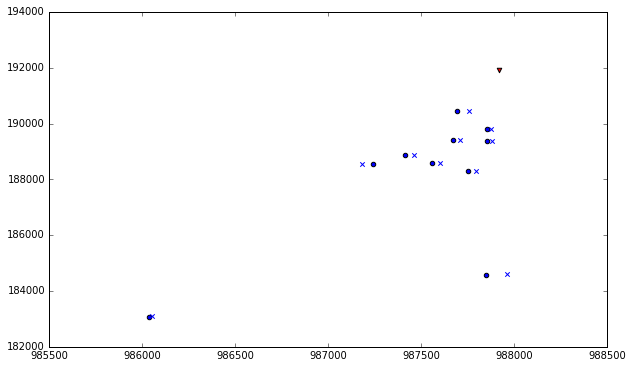

In [464]:
plt.figure(figsize = (10, 6))
#plt.scatter(cxim, cyim)
plt.scatter(xy[:,0], xy[:,1])
plt.scatter(test_rad[:,0], test_rad[:,1], marker = 'x') # Projected points
plt.scatter(9.87920425e+05, 1.91912958e+05, marker='v', c = 'red')

#### Projected z vs. actual z

In [465]:
test_rad

array([[  9.87883839e+05,   1.89373852e+05,   5.75978264e+02],
       [  9.87962351e+05,   1.84602564e+05,   9.89664059e+02],
       [  9.87796738e+05,   1.88286896e+05,   6.27689564e+02],
       [  9.86055884e+05,   1.83098199e+05,   1.07634023e+03],
       [  9.87182785e+05,   1.88558329e+05,   5.79751177e+02],
       [  9.87461801e+05,   1.88862021e+05,   6.18781734e+02],
       [  9.87601552e+05,   1.88603175e+05,   6.18081446e+02],
       [  9.87710596e+05,   1.89427999e+05,   5.59848542e+02],
       [  9.87876514e+05,   1.89802335e+05,   5.28872165e+02],
       [  9.87758655e+05,   1.90434915e+05,   3.81757625e+02]])

In [466]:
ldr_fid[:,2]

array([  60. ,   58. ,  128. ,   32. ,   93. ,   55.7,  117. ,   60. ,
         46.5,   97.2])